In [1]:
# Assignment-1

Dataset: customers.csv
Tasks to be performed:
1. K-Means Clustering:
 - Load customer data.
 - Check the number of cells in each column with null values.
 - Create a scatter plot with Age as X and Spending Score as Y.
 - Draw a scatter plot displaying data points colored on the basis of clusters.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv("D:\\Dataset\\Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


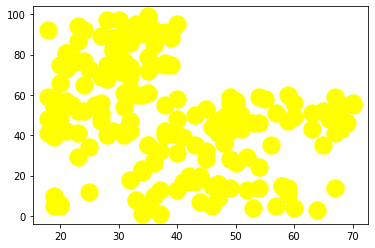

In [6]:
x=df["Age"]
y=df["Spending Score (1-100)"]
plt.scatter(x,y,c="yellow",s=300)

In [7]:
z=np.array(list(zip(x,y)))


In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(z)
label=kmeans.predict(z)
centroids=kmeans.cluster_centers_
print(centroids)

[[46.16521739 32.88695652]
 [28.95294118 73.62352941]]


In [9]:
sct=np.array(print(centroids))

[[46.16521739 32.88695652]
 [28.95294118 73.62352941]]


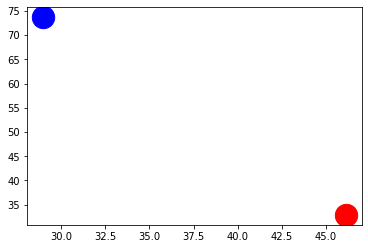

In [10]:
plt.scatter(28.95294118,73.62352941,s=500,c="blue")
plt.scatter(46.16521739,32.88695652,s=500,c="red")
plt.show()

In [11]:
#A Assignment-2

Dataset: customers.csv
Tasks to be performed:
1. K-Means Clustering:
 - Load customer data.
 - Check the number of cells in each column with null values.
 - Create a scatter plot with Age as X and Spending Score as Y.
 - Find out the best number for clusters between 1 and 10 (inclusive) using the elbowmethod.
 - Draw a scatter plot displaying data points colored on the basis of clusters.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df=pd.read_csv("D:\\Dataset\\Customers.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


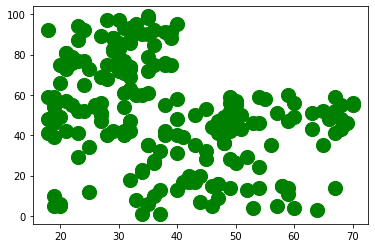

In [15]:
x=df["Age"]
y=df["Spending Score (1-100)"]
plt.scatter(x,y,c="green",s=200)
plt.show()

In [16]:
z=np.array(list(zip(x,y)))

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [18]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(z)
    kmeanModel.fit(z)
 
    distortions.append(sum(np.min(cdist(z, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / z.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(z, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / z.shape[0]
    mapping2[k] = kmeanModel.inertia_

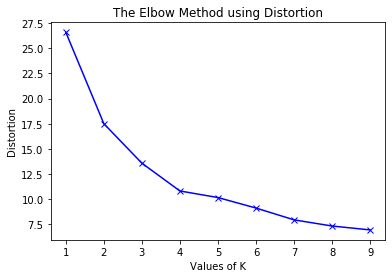

In [19]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [20]:
# Assignment-3

- Load iris data from load_iris function from sklearn.datasets package.
- From the dataset extract the data property.
- Train an AgglomerativeClustring model based on the data.
- Plot dendrogram to visualize the clustering linkage

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 

In [22]:
iris=pd.read_csv("D:\\Dataset\\Iris.csv")

In [23]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
X=iris.iloc[:,1:4]

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [26]:
X.fillna(method ='ffill', inplace = True)

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [29]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

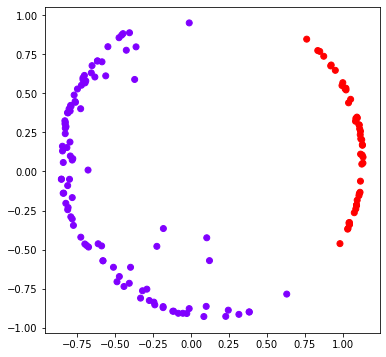

In [30]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [31]:
# Assignment-4

Data:[[5,3],
[10,15],
[15,12],
[24,10],
[30,30],
[85,70],
[71,80],
[60,78],
[70,55],
[80,91],]
Tasks to be performed:
  Using the np.array function create an np array from the data given above.
  Generate a scatter plot for the data.
  Plot dendrogram to visualize the clustering linkage

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
X=np.array([[5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91]])

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [37]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

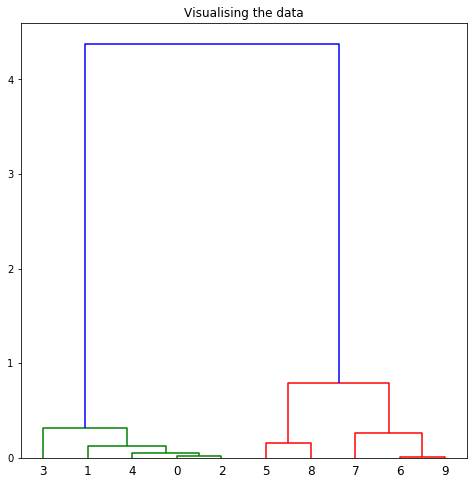

In [38]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

In [39]:
# Assignment-5

Dataset: retail_dataset.csv
Tasks to be performed:
 - Using pandas import the dataset as dataframe
 - Install the mixtend library to use apriory and association rule mining
 - Using the apriori algorithm generate a list of item frequently brought together.
 - Generate the association rules for the given items from apriori algorithm

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
store_data=pd.read_csv("D:\\Dataset\\store_data.csv",header=None)

In [50]:
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
store_data.shape

(7501, 20)

In [52]:
records = []
for i in range(0,7500):
    records.append([str(store_data.values[i,j]) for j in range(0,20)])

In [53]:
!pip install apyori

In [46]:
from apyori import apriori

In [54]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [55]:
print(len(association_results))
print(association_results[0])
print(association_results[1])

48
RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)])
RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)])


In [ ]:
#########